# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual (Ashok Kumar)


# **Project Summary -**

The rise of bike and scooter ride-sharing services in urban environments presents a challenge in accurately forecasting service demand. Both overestimation and underestimation of demand can lead to inefficient use of resources or lost revenue. This project aims to address this issue by integrating historical bike usage data with weather information to better predict rental demand.

The dataset used in this project includes eight input variables: 'Date', 'Seasons', 'Holiday', 'Functional Day', 'Temperature', 'Humidity', 'Dew Point Temperature', and 'Windspeed'. The project employs Python libraries such as Pandas, Seaborn, NumPy, and scikit-learn (sklearn) to develop a predictive algorithm. Various models will be assessed to identify those that offer the most accurate forecasts and are suitable for practical deployment.

Accurate forecasting of bike rental demand can bring numerous benefits. For ride-sharing companies, it can lead to more efficient resource management, reducing waste and enhancing profitability. By optimizing bike maintenance schedules, parking space allocation, and operational planning according to predicted demand, these companies can improve their operational efficiency.

Furthermore, precise demand predictions can enhance customer satisfaction by ensuring a sufficient supply of bikes and scooters, minimizing instances of unavailability. This improved service can boost customer loyalty, generate positive reviews, and support sustained business growth.

Additionally, promoting the use of bikes and scooters aligns with environmentally friendly transportation goals. By incorporating weather data into demand predictions, companies can better match bike availability with favorable cycling conditions, encouraging more people to choose biking. This can help reduce traffic congestion and lower carbon emissions, contributing to more sustainable urban mobility.

In summary, this project's objective is to combine historical bike usage patterns with weather data to achieve accurate demand forecasting. By leveraging advanced algorithms and machine learning techniques, the project aims to optimize resource allocation, minimize waste, and enhance profitability. It also seeks to improve customer satisfaction and support environmentally friendly transportation, fostering a more sustainable and efficient urban mobility system.

# **GitHub Link -**


https://github.com/ashok14867/Bike-Sharing-Demand-Prediction-Regression

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
from google.colab import drive                                                  # for mounting the dataset

import numpy as np                                                              # for processing single-dimensional data centric operations
import pandas as pd                                                             # for processing multi-dimensional data centric operations
import matplotlib.pyplot as plt                                                 # for plotting 2D graphs
import seaborn as sns                                                           # for plotting 3D & more sophisticated statstical graphs
import missingno as msno                                                        # for plotting null values

import random                                                                   # for randomly picking visualizations background style

import warnings                                                                 # for ignoring any warning interruptions that can disrupt the flow of code

from datetime import datetime                                                   # for converting the Dtype of a categorical date feature from object to datetime64[ns]
import datetime as dt

from statsmodels.stats.outliers_influence import variance_inflation_factor      # for using VIF in order to detect multicollinearity between features

import statsmodels.api as sm                                                    # Perform Statistical Test to obtain P-Value

from scipy.stats import zscore                                                  # for Scaling the data

from sklearn.preprocessing import MinMaxScaler                                  # for transforming the features on a common scale
from sklearn.preprocessing import OneHotEncoder                                 # for transforming categorical data into numerical binary format
from sklearn.preprocessing import OrdinalEncoder                                # for transforming categorical data into ordinal values with natural ordering
from sklearn.preprocessing import LabelEncoder                                  # for transforming categorical data into unique integer values

from sklearn.model_selection import train_test_split                            # for splitting the dataset into training & testing set
from sklearn.model_selection import GridSearchCV                                # for utilizing Grid Search Cross Validation
from sklearn.model_selection import cross_validate                              # for utilizing cross validation inorder to check the perforamnce of the model
from sklearn.model_selection import RandomizedSearchCV                          # for utilizing Ranodm search cross validation inorder to select best hyperparameter for the model

from sklearn.linear_model import LinearRegression                               # for fitting a Linear Regression model onto the data distribution
from sklearn.linear_model import Lasso                                          # for fitting a Lasso Regression model onto the data distribution
from sklearn.linear_model import Ridge                                          # for fitting a Ridge Regreesion model onto the data distribution

from sklearn.metrics import *                                                   # for including Evaluation metrics in order to quantify the performance of predictive models

### Dataset Loading

In [3]:
# Load Dataset

# Mount google colab with google drive
from google.colab import drive
drive.mount('/content/drive')

file = '/content/drive/MyDrive/SeoulBikeData.csv'
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Read the dataset
data = pd.read_csv(file,encoding='ISO-8859-9')

Mounted at /content/drive


### Handling Warnings and Assigning Background Randomizer

In [4]:
# Ignoring interpreter generated Warnings
warnings.filterwarnings(action='ignore')

### Dataset First View

In [84]:
# Dataset First Look
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [83]:
# Dataset First Look
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
data.shape

(8760, 14)

### Dataset Information

In [8]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
data.isna().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


<Axes: >

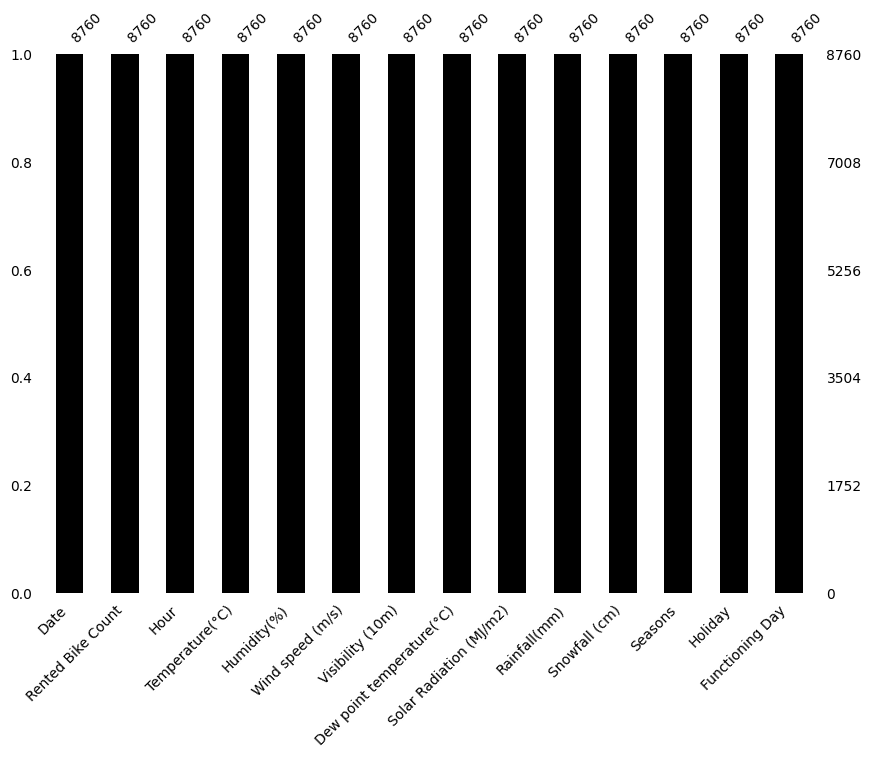

In [11]:
# Visualizing the missing values
msno.bar(data, figsize=(10, 7), fontsize=10, color='black')

### What did you know about your dataset?

The dataset we've been presented with explains monthly stock prizes of the bank since it's inception and it includes the closing, starting, highest & lowest stock prizes of every month.

Our main aim is to predict bike count at each hour for a stable supply of rental bikes.

The above dataset comprises of 8760 rows & 14 columns.

There are 0 duplicates present in the dataset.

There are 0 missing values present in the dataset.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
list(data.columns)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [13]:
# Dataset Describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description

Our Dataset comprises of 8760 rows & 14 columns.



Following is the description regarding each column:
  
* **Date** - day/month/year
* **Rented Bike count** - Count of bikes rented per hour
* **Hour** - Hour of the day
* **Temperature(°C)**-Temperature in Celsius
* **Humidity(%)** - Humidity in the air in %
* **Wind speed (m/s)** - Speed of the wind in  m/s
* **Visibility (10m)** - Visibility in m (10m)
* **Dew point temperature(°C)** - Temperature at the beggining of the day(Celsius)
* **Solar Radiation (MJ/m2)** -Sun contribution (MJ/m2)
* **Rainfall(mm)** - Amount of raining in mm
* **Snowfall(cm)** - Amount of snowing in cm
* **Seasons** - Winter, Spring, Summer, Autumn
* **Holiday** - Holiday/No holiday
* **Functional Day** -  If the day is a Functional Day or not



From above Overview, we can conclude that:

*   **Categorical Discrete Variables (dtype: object)** - Date, Seasons, Holiday, Functioning Day.
*   **Numerical Discrete Variables (dtype: int64)** - Hour.

*   **Numerical Continuous Variables (dtype: float64)** - Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall(cm).



*   **Dependent/Target/Y variable** - "Rented Bike count"






### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for i in list(data.columns):
  print(f"""No. of unique values in "{i}" is {data[i].nunique()}.""")

No. of unique values in "Date" is 365.
No. of unique values in "Rented Bike Count" is 2166.
No. of unique values in "Hour" is 24.
No. of unique values in "Temperature(°C)" is 546.
No. of unique values in "Humidity(%)" is 90.
No. of unique values in "Wind speed (m/s)" is 65.
No. of unique values in "Visibility (10m)" is 1789.
No. of unique values in "Dew point temperature(°C)" is 556.
No. of unique values in "Solar Radiation (MJ/m2)" is 345.
No. of unique values in "Rainfall(mm)" is 61.
No. of unique values in "Snowfall (cm)" is 51.
No. of unique values in "Seasons" is 4.
No. of unique values in "Holiday" is 2.
No. of unique values in "Functioning Day" is 2.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
# Creating an instance of the dataset in order to preserve the original dataset.
bike_df = data.copy()

In [16]:
#Renaming the columns
bike_df = bike_df.rename(columns={'Temperature(°C)':'Temperature', 'Humidity(%)':'Humidity', 'Wind speed (m/s)':'Wind speed', 'Visibility (10m)':'Visibility',
                            'Dew point temperature(°C)':'Dew point temperature', 'Solar Radiation (MJ/m2)':'Solar Radiation', 'Rainfall(mm)':'Rainfall',
                            'Snowfall (cm)':'Snowfall'})

In [17]:
# converting the Dtype of a categorical 'Date' feature from object to datetime64[ns]
print(f"Initial Dtype of Date (pre-conversion): '{bike_df['Date'].dtype}'")
bike_df['Date'] = bike_df['Date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
print(f"Final Dtype of Date (post-conversion): '{bike_df['Date'].dtype}'")

Initial Dtype of Date (pre-conversion): 'object'
Final Dtype of Date (post-conversion): 'datetime64[ns]'


In [18]:
# creating new columns by extracting Day, Month & Year out of the 'Date' column
bike_df['Day'] = bike_df['Date'].dt.day_name()
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['Year'] = bike_df['Date'].dt.year

In [19]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017


In [20]:
# creating a new column called 'Weekend' that takes Functional days as 0 & Non-functional days as 1
bike_df['Weekend'] = bike_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
bike_df['Weekend'].value_counts()

,count
Weekend,
0,6264
1,2496


In [21]:
# dropping 'Date', 'Day' & 'Year' columns
bike_df.drop(columns=['Date', 'Day','Year'], axis=1, inplace=True)

In [22]:
bike_df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


### What all manipulations have you done and insights you found?

**Following are some of the steps that were carried out and some insights that have been found while performing Data wrangling:**



1.   In order to avoid tampering with the original dataset, we created an instance of it.
2.   We found out that there's a 'Date' variable which was of Dtype: object, hence we converted it to Dtype: datetime64.
3.  After the conversion, we created new columns by extracting 'Day', 'Month' & 'year' from the 'Date' column.
4.  After the extraction, we used the 'Day' column to create a new column called 'Weekend', which takes 0 for Functional Days & 1 for Non-Functional Days.
5.  Later, we drop the irrelevant columns 'Date', 'Day' & 'Year'.














## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis**

#### Chart - 1

In [23]:
# Considering only the Dependent feature
bike_df['Rented Bike Count'].value_counts()

,count
Rented Bike Count,
0,295
122,19
223,19
262,19
165,18
103,18
189,18
178,17
170,17


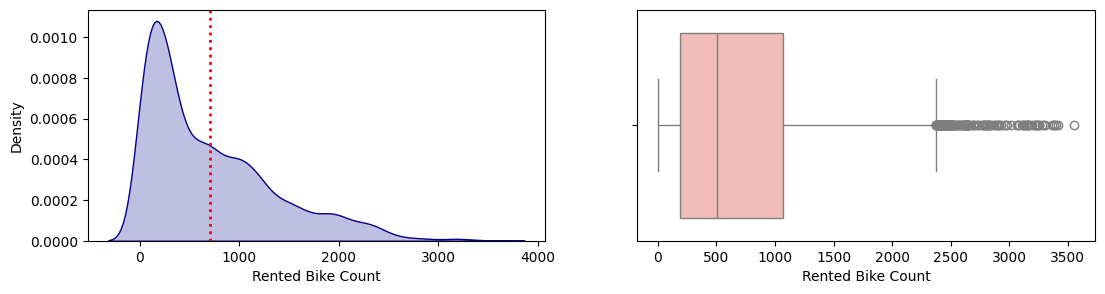

In [24]:
# Checking the Distribution of Target variable by making 2 plots
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,3))

# Checking the Skewness of Target variable about it's mean - using Kernel Density Estimation Plot
sns.kdeplot(bike_df,x='Rented Bike Count',fill=True,color='darkblue',ax=ax1)
ax1.axvline(bike_df['Rented Bike Count'].mean(), color='red', linestyle=':', linewidth=2)

# Checking the Outliers present in the Target variable - using Box Plot
sns.boxplot(bike_df,x='Rented Bike Count',ax=ax2,palette='Pastel1')

plt.show()

##### 1. Why did you pick the specific chart?



   



*   Kernel Density Estimation Plot describes the skewness of Dependent variable.
*   Box Plot describes the presence of outliers in the Dependent variable.



##### 2. What is/are the insight(s) found from the chart?



*   Dependent variable is positively skewed about it's mean.
*   Dependent variable has a lot of Outliers.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The insights gained from analyzing data i.e, a positively skewed dependent variable (Bike rented count) and a high number of outliers can potentially create a positive business impact.

However, the presence of these outliers describes instances where there are extremely high bike rental counts, which may indicate exceptional demand spikes or anomalies.

While this may not directly lead to negative growth, it can pose challenges in capacity planning, resource allocation, and service delivery, requiring businesses to carefully manage and optimize operations to meet customer demand and prevent potential negative impacts on customer satisfaction and business growth.

#### Chart - 2

In [25]:
# Considering Independent Numerical features & excluding the Dependent feature
Numerical_feat = bike_df.describe().columns.drop('Rented Bike Count')
list(Numerical_feat)

['Hour',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Dew point temperature',
 'Solar Radiation',
 'Rainfall',
 'Snowfall',
 'Month',
 'Weekend']

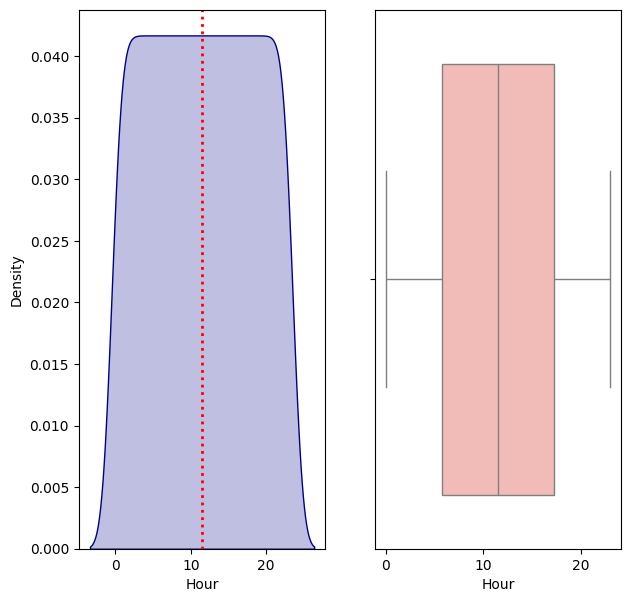

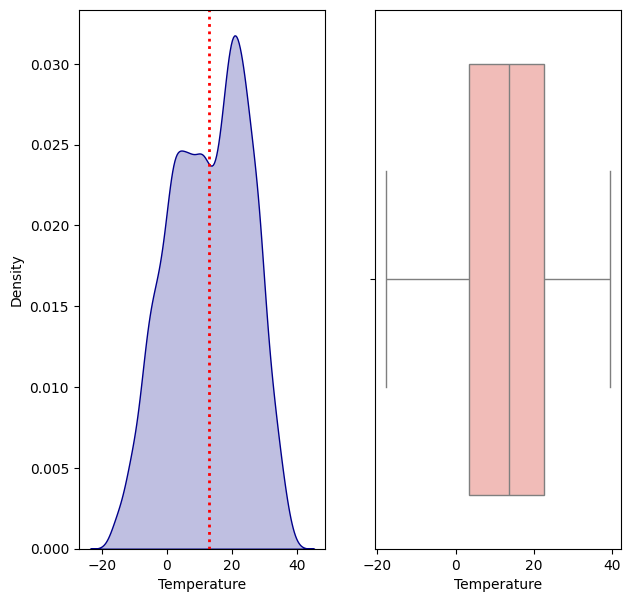

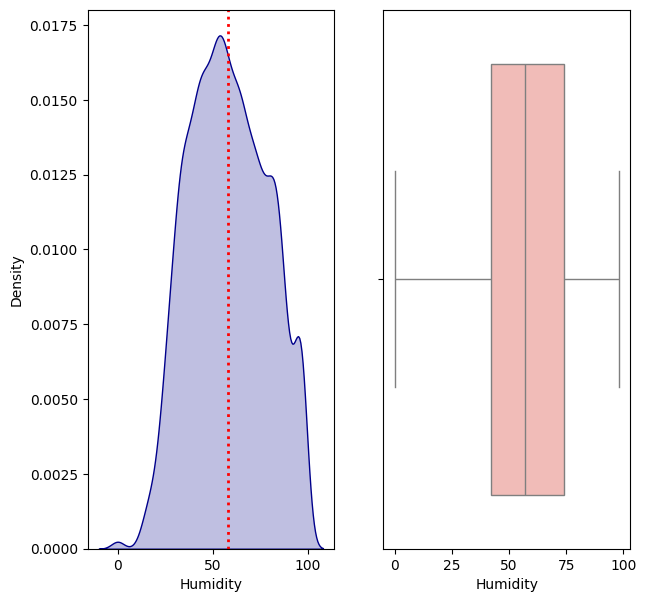

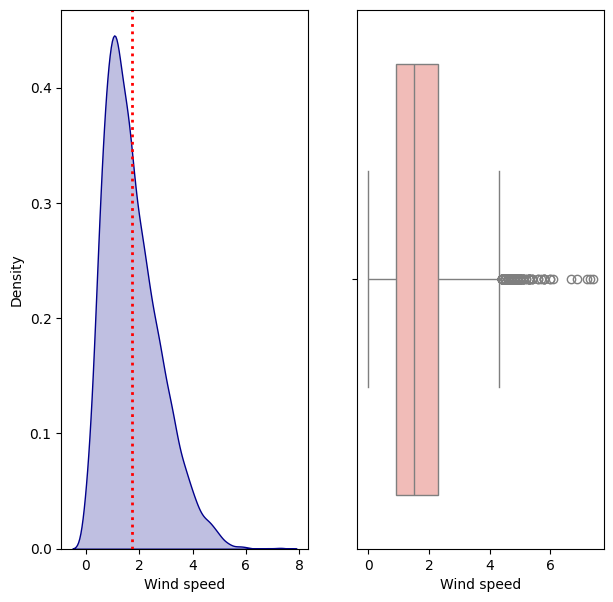

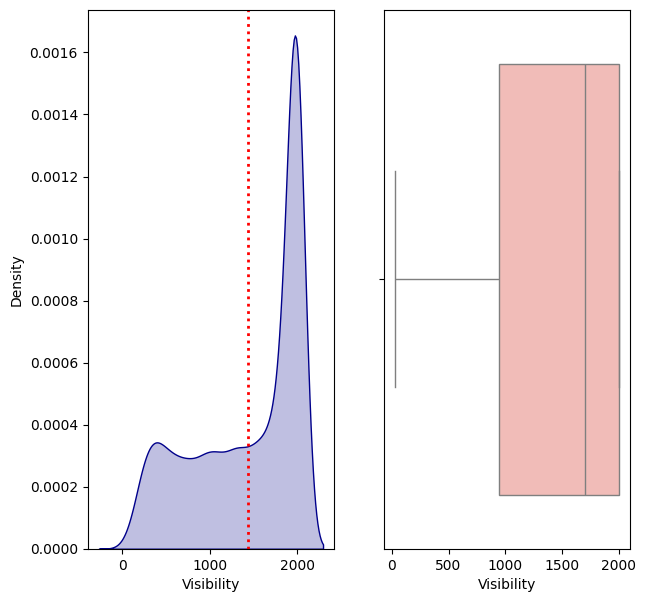

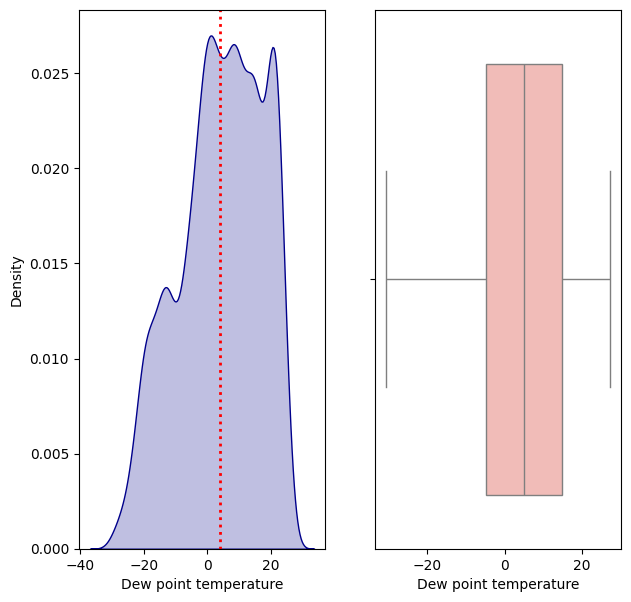

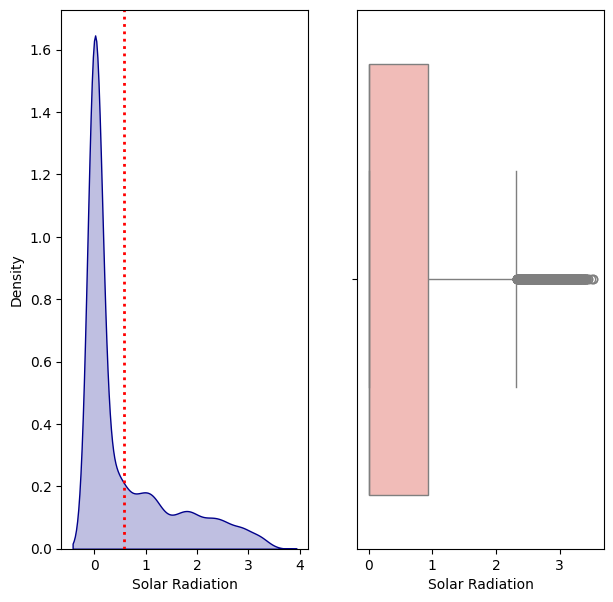

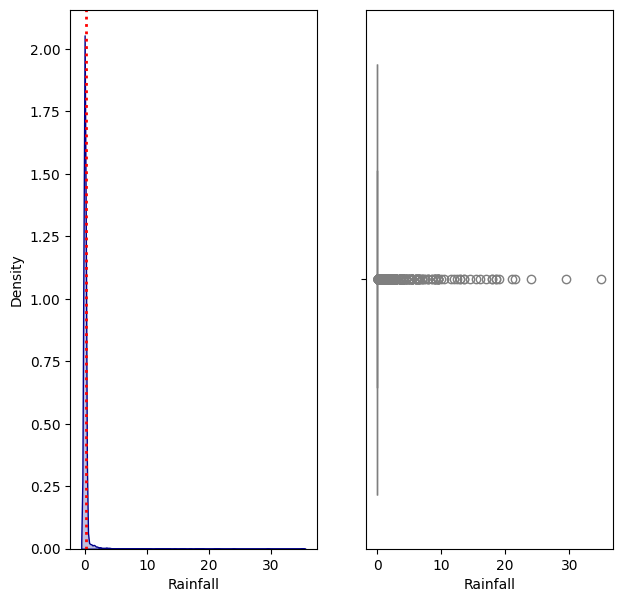

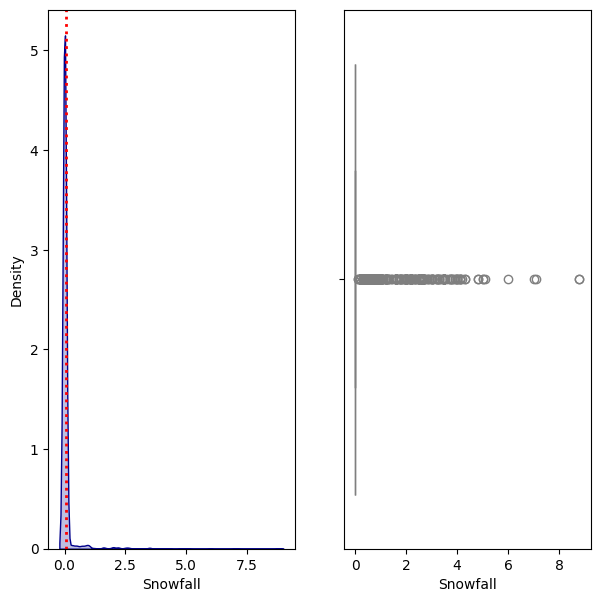

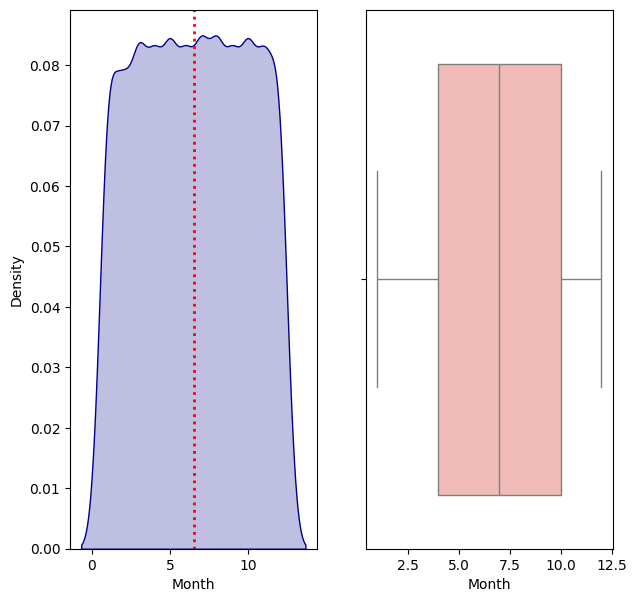

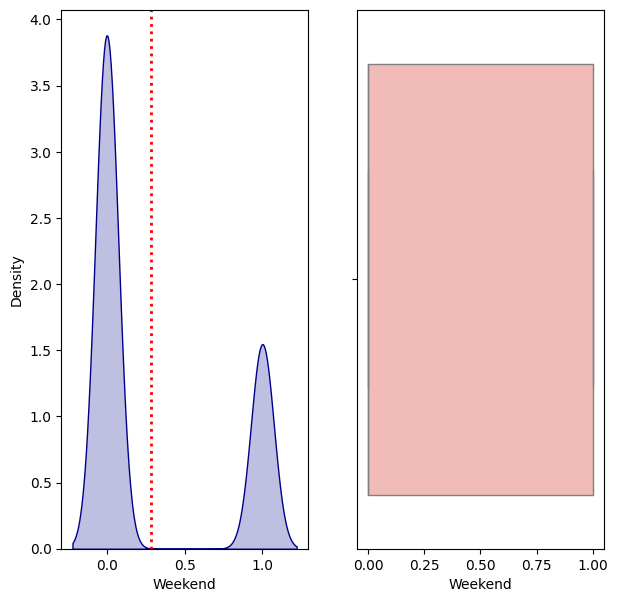

In [26]:
# Checking the Distribution of Independent Numerical features by making 2 plots
for feat in Numerical_feat:
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,7))
  sns.kdeplot(bike_df, x=feat, fill=True, color='darkblue', ax=ax1)
  ax1.axvline(bike_df[feat].mean(), color='red', linestyle=':', linewidth=2)
  sns.boxplot(bike_df, x=feat, ax=ax2, palette='Pastel1')
  plt.show()
  print('\n\n')

##### 1. Why did you pick the specific chart?

*   Kernel Density Estimation Plot describes the skewness of Independent Numerical features.
*   Box Plot describes the presence of outliers in the Independent Numerical features.

##### 2. What is/are the insight(s) found from the chart?

*   Some Independent Numerical features exhibit skeweness.
*   Some Independent Numerical features have Outliers in them.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from carefully analyzing and appropriately handling the skewness and outliers of Independent Numerical features can help create a positive business impact.

By accurately understanding and addressing these data characteristics, businesses can make informed decisions, develop effective strategies, and optimize their operations.

This can lead to improved resource allocation, targeted marketing, enhanced customer satisfaction, and overall positive growth and performance in the business.

#### Chart - 3

In [27]:
# Considering the Independent Categorical features
Categorical_feat = bike_df[['Seasons', 'Holiday', 'Functioning Day']]
list(Categorical_feat)

['Seasons', 'Holiday', 'Functioning Day']

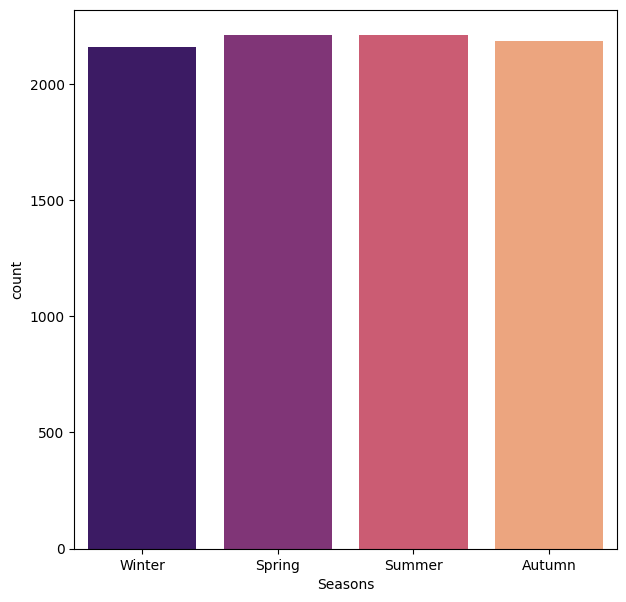

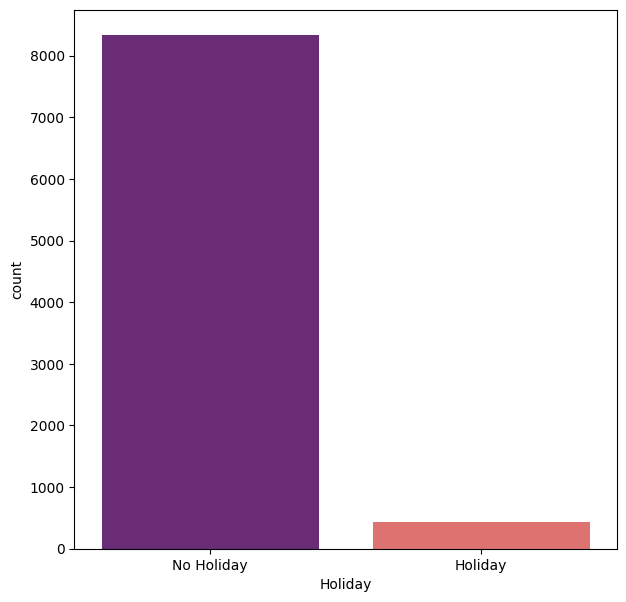

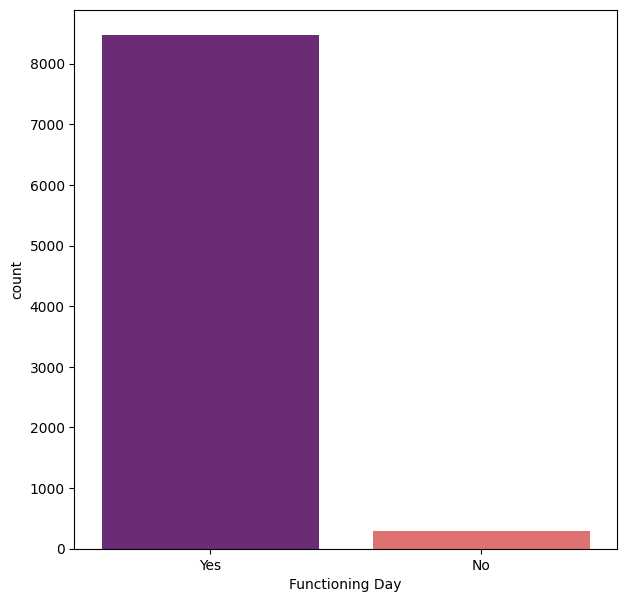

In [28]:
# Checking the Distribution of Independent Categorical features by making 1 plot
for feat in Categorical_feat:
  fig, (ax1) = plt.subplots(1, figsize=(7,7))
  sns.countplot(bike_df, x=feat, palette="magma")
  plt.show()
  print('\n')

##### 1. Why did you pick the specific chart?




*   Countplot helps in describing the count of Rental Bikes for 3 Categorical features: Seasons, Holiday, Functional Day.






##### 2. What is/are the insight(s) found from the chart?

*   The count of Rental Bikes remains the same across different seasons.
*   THe count of Rental Bikes is highly imbalanced in both: Holiday & Functional Day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Analyzing the count of rental bike patterns across seasons, holidays, and functional days provides a valuable insight for understanding the fluctuation in demand and optimizing resource allocation accordingly.

### **Bivariate Analysis**

#### Chart - 4

In [29]:
# Considering the Independent Numerical features
list(Numerical_feat)

['Hour',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Dew point temperature',
 'Solar Radiation',
 'Rainfall',
 'Snowfall',
 'Month',
 'Weekend']

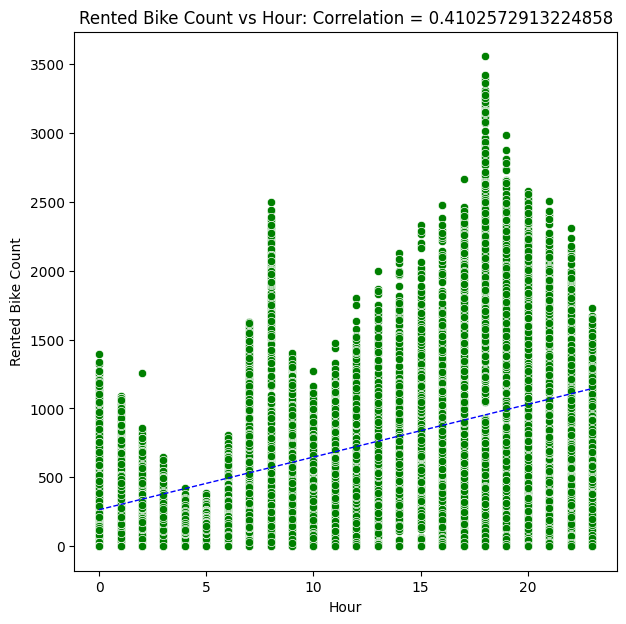

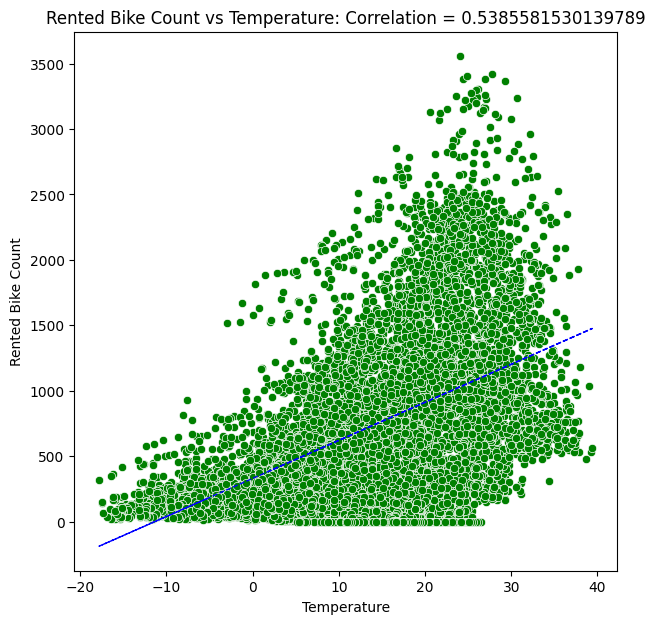

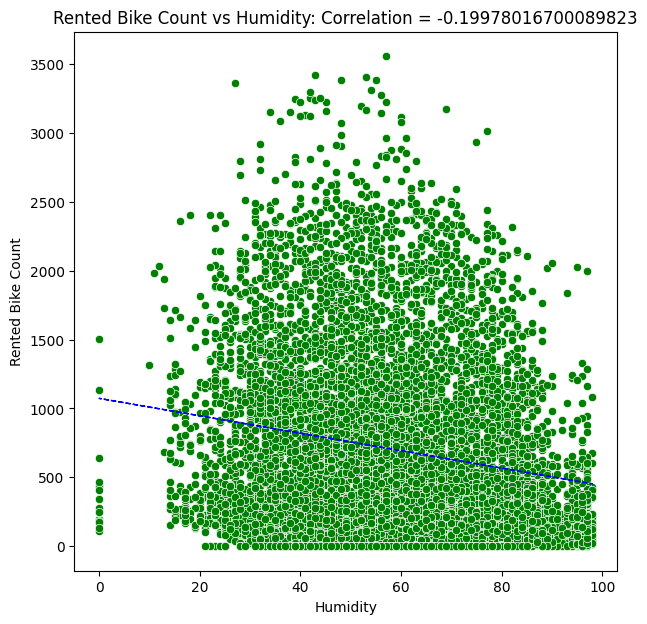

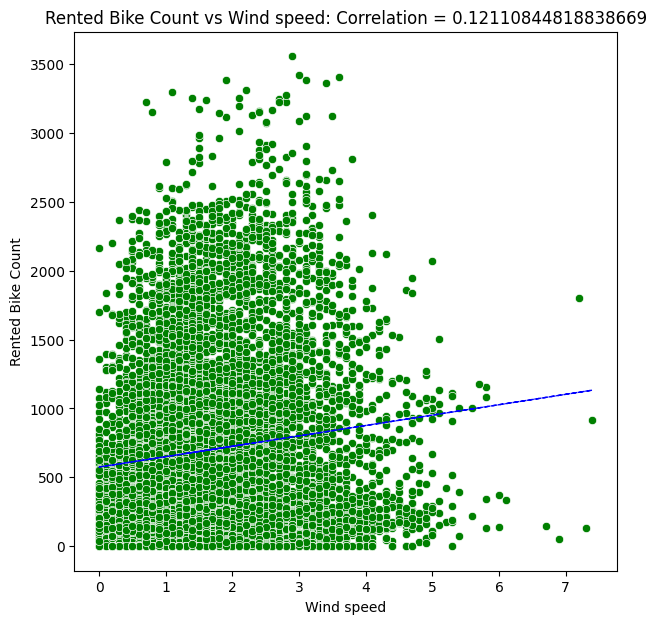

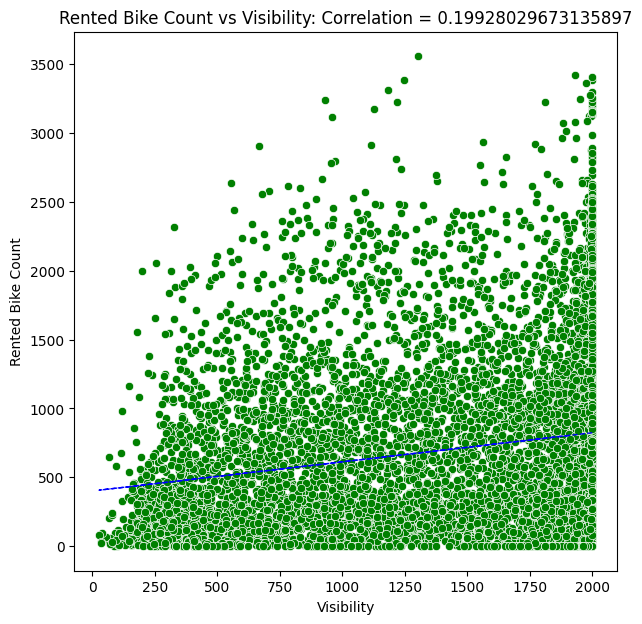

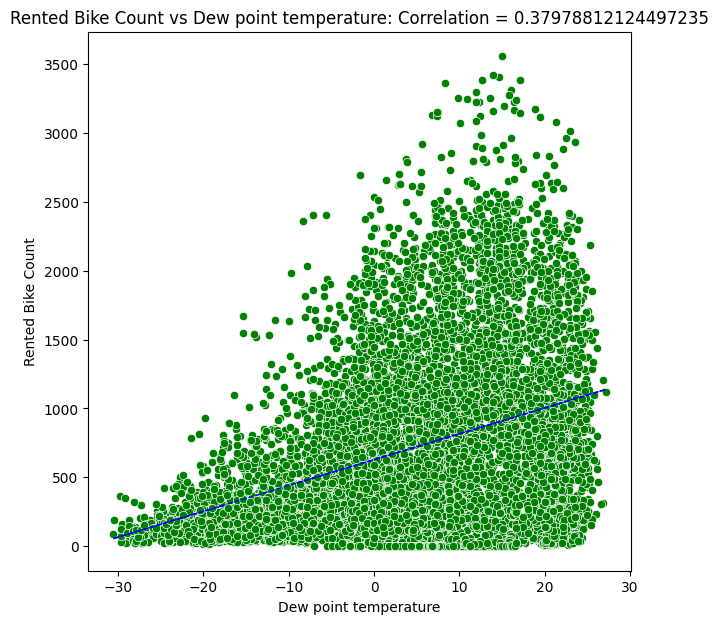

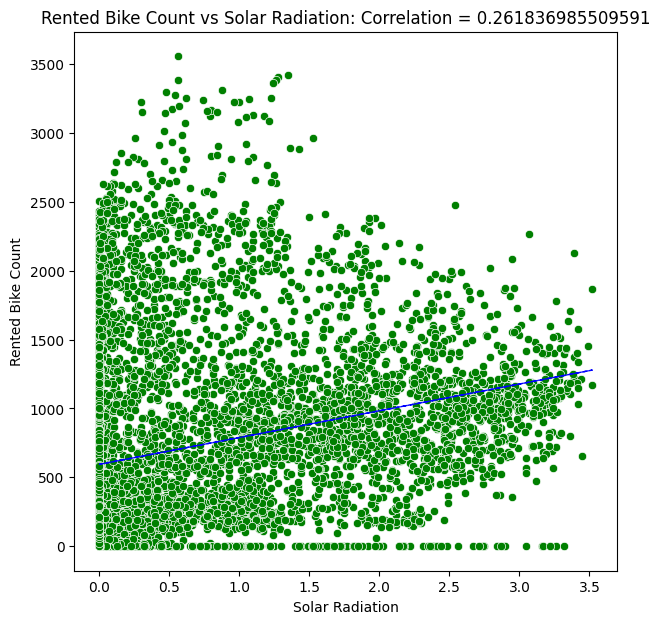

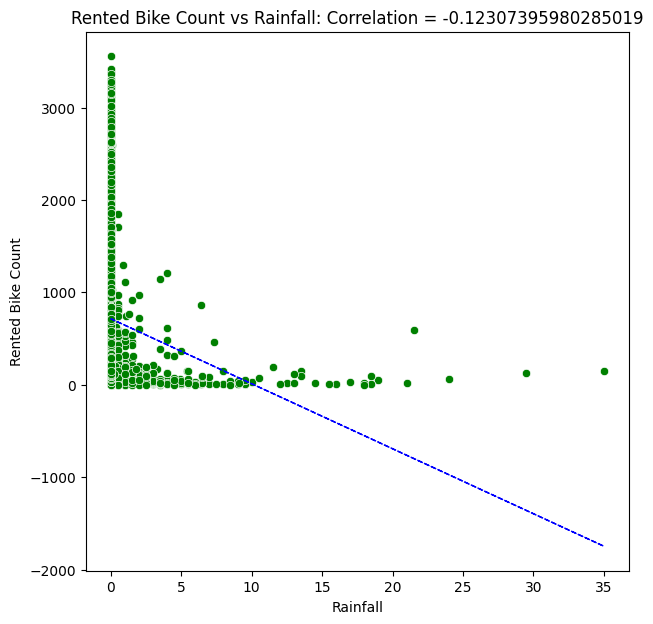

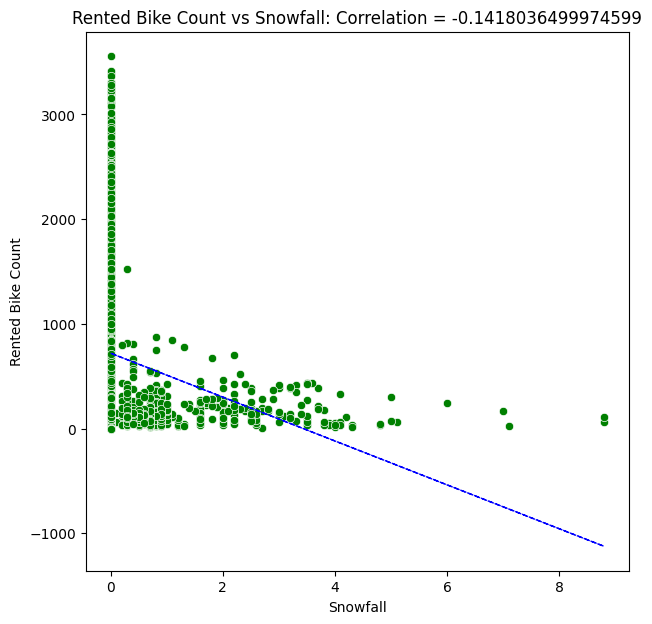

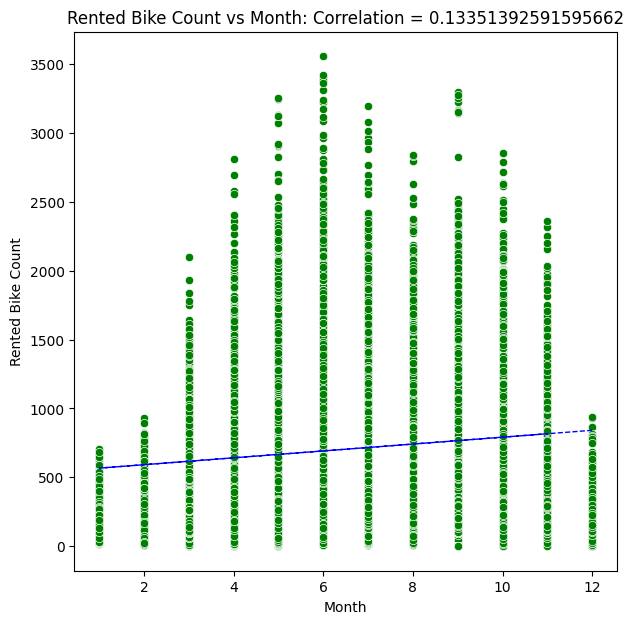

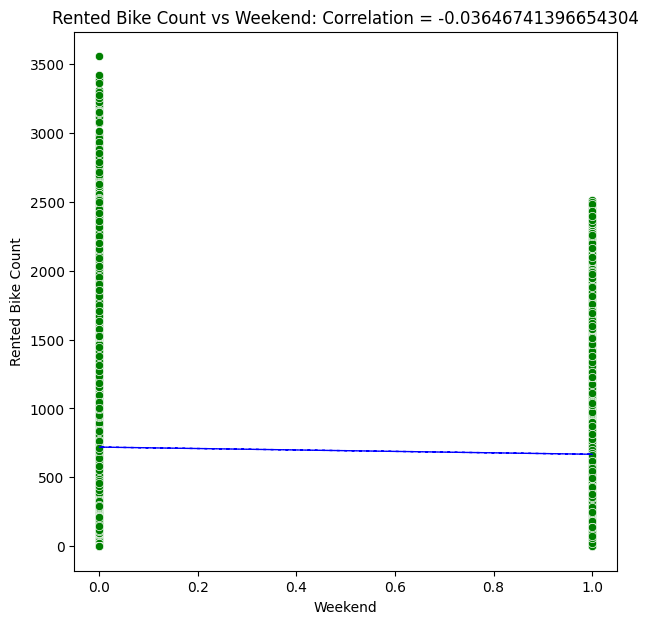

In [30]:
# Checking the relationship between Independent Numerical features & the Dependent variable
for feat in Numerical_feat:
  plt.figure(figsize=(7,7))
  sns.scatterplot(bike_df,x=feat,y='Rented Bike Count',color='green')
  correlation=bike_df[feat].corr(bike_df['Rented Bike Count'])
  plt.title('Rented Bike Count vs ' + feat + ': Correlation = '+str(correlation) )
  z = np.polyfit(bike_df[feat], bike_df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(bike_df[feat])
  plt.plot(bike_df[feat], y_hat,'b--', lw=1)
  plt.show()
  print('\n\n\n')

##### 1. Why did you pick the specific chart?



*   Scatterplot helps in understanding the relationship between Independent Numerical features and the Dependent variable by plotting a regression line helps in visualizing and understanding the coorelation between them.




##### 2. What is/are the insight(s) found from the chart?



*   Independent Numerical features like: Hour, Temperature, wind speed, visibility, dew point temperature,solar radiation & month exhibit positive correlation with our dependent variable: Rented Bike Count.
*   Independent Numerical features like: Humidity, Rainfall & Snowfall exhibit negative correlation with our dependent variable: Rented Bike Count.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained indicating positive correlations between Hour, Temperature, wind speed, visibility, dew point temperature, solar radiation, and month with the Rented Bike Count can inform business decisions such as optimizing operational hours, adjusting pricing, and targeting marketing efforts to maximize bike rentals and drive positive business impact.

Additionally, understanding the negative correlations with other numerical features can help identify areas for improvement and implement strategies to mitigate potential negative impacts on bike rentals.

#### Chart - 5

In [31]:
# Considering the Independent Categorical features
list(Categorical_feat)

['Seasons', 'Holiday', 'Functioning Day']

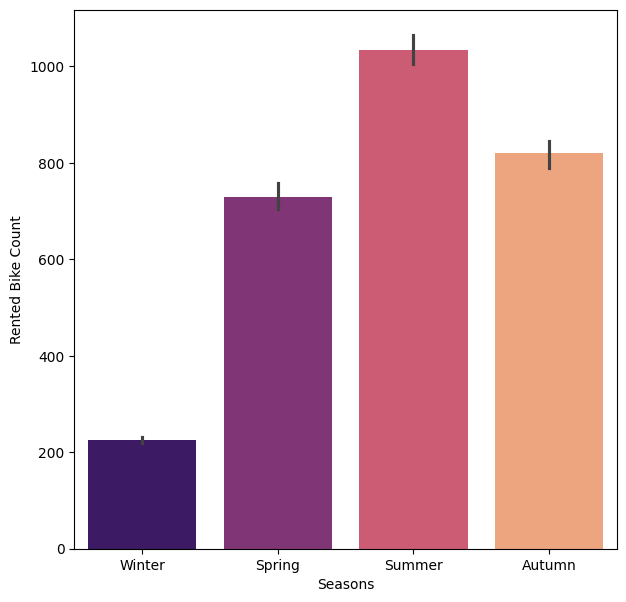

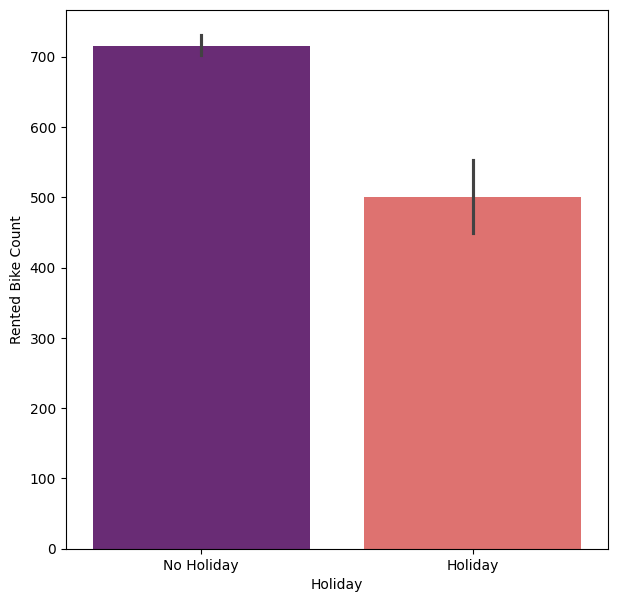

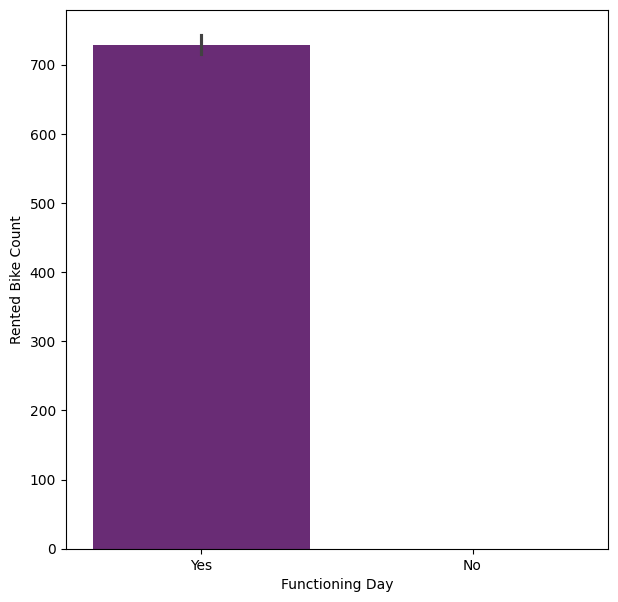

In [32]:
# Checking the relationship between Independent Categorical features & the Dependent variable
for feat in Categorical_feat:
  fig, (ax1) = plt.subplots(1, figsize=(7,7))
  sns.barplot(bike_df, x=feat, y='Rented Bike Count', palette="magma", ax=ax1)
  plt.show()
  print('\n')

##### 1. Why did you pick the specific chart?



*   Bar plot for plotting the variation in Rented Bike count due to Seasons,Holiday and Functioning day.




##### 2. What is/are the insight(s) found from the chart?

* The Bike Rent Count is maximum during summer but minimum during winter.
* During holidays, Bike Rent counts drop down.
* Contribution of non-funtioning day to the Bike Rent count is insignificant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained about the count being maximum during summer, dropping during winter, and decreasing during holidays can help businesses plan their resources, adjust marketing strategies, and optimize operations to meet customer demand, resulting in a positive business impact.

Additionally, the understanding that non-functioning days have an insignificant contribution can guide businesses in allocating resources more efficiently.

#### Chart - 6

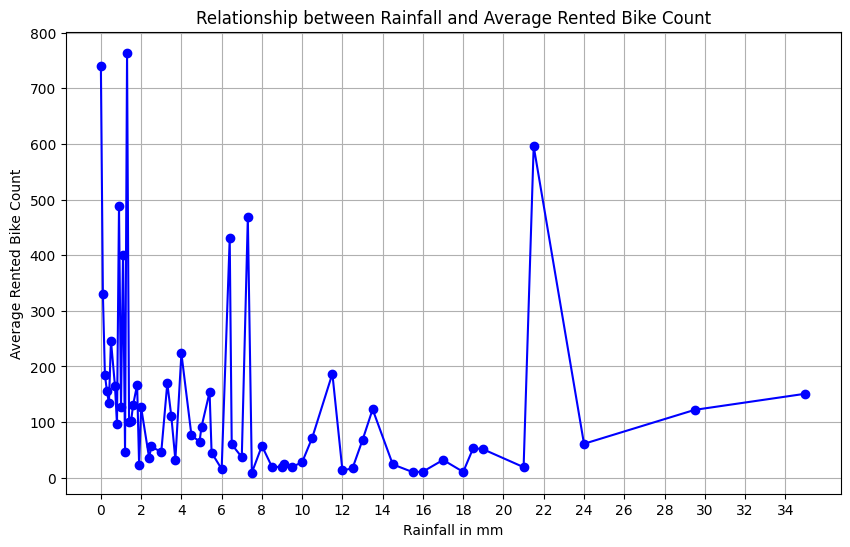

In [33]:
# Ensure 'Rainfall' and 'Rented Bike Count' are numeric
bike_df['Rainfall'] = pd.to_numeric(bike_df['Rainfall'], errors='coerce')
bike_df['Rented Bike Count'] = pd.to_numeric(bike_df['Rented Bike Count'], errors='coerce')

# Drop rows with NaN values in 'Rainfall' or 'Rented Bike Count'
bike_df = bike_df.dropna(subset=['Rainfall', 'Rented Bike Count'])

# Group by 'Rainfall' and calculate the mean 'Rented Bike Count'
rainfall_grouped = bike_df.groupby('Rainfall')['Rented Bike Count'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
rainfall_grouped.plot(color='b', marker='o')
plt.xlabel('Rainfall in mm')
plt.ylabel('Average Rented Bike Count')
plt.title('Relationship between Rainfall and Average Rented Bike Count')
plt.xticks(range(0, int(bike_df['Rainfall'].max()) + 1, 2))
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?




*   Continuous plot for analyzing the frequency of Rented Bike counts over mm's of Rainfall.



##### 2. What is/are the insight(s) found from the chart?


*   The above plot indicates that despite heavy rainfall, the demand for rented bikes does not decrease. For instance, even with a rainfall of 22-24 mm, there is a significant peak in the number of rented bikes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained i.e, the heavy rainfall preventing the decrease in the demand for rented bikes can have a positive business impact.

Businesses can leverage this information to optimize their operations during rainy periods and ensure a continuous supply of bikes, meeting customer demands and potentially increasing the revenue.

#### Chart - 7

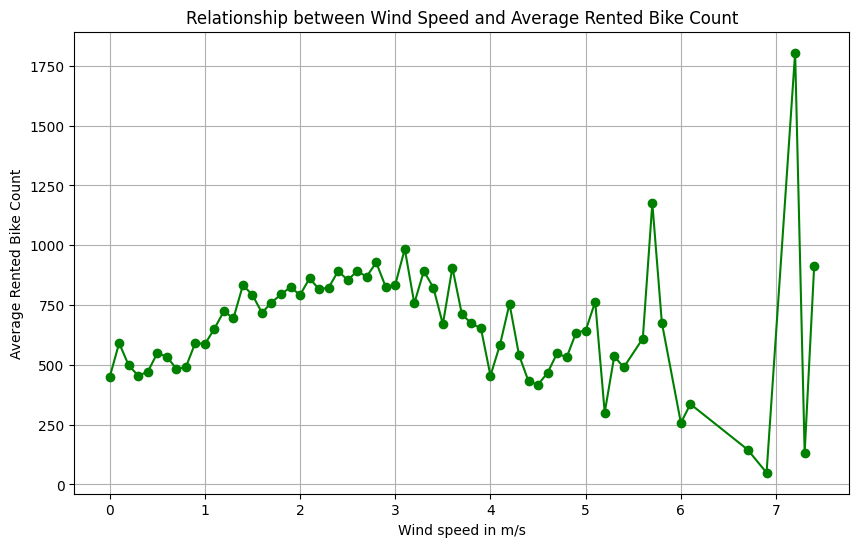

In [34]:
# Ensure 'Wind speed' and 'Rented Bike Count' are numeric
bike_df['Wind speed'] = pd.to_numeric(bike_df['Wind speed'], errors='coerce')
bike_df['Rented Bike Count'] = pd.to_numeric(bike_df['Rented Bike Count'], errors='coerce')

# Drop rows with NaN values in 'Wind speed' or 'Rented Bike Count'
bike_df = bike_df.dropna(subset=['Wind speed', 'Rented Bike Count'])

# Group by 'Wind speed' and calculate the mean 'Rented Bike Count'
wind_speed_grouped = bike_df.groupby('Wind speed')['Rented Bike Count'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
wind_speed_grouped.plot(color='g', marker='o')
plt.xlabel('Wind speed in m/s')
plt.ylabel('Average Rented Bike Count')
plt.title('Relationship between Wind Speed and Average Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

*   Continuous plot for analyzing the frequency of Rented Bike counts over m/ses of Wind speed.

##### 2. What is/are the insight(s) found from the chart?



*   The above plot indicates that the demand for rented bikes is evenly distributed regardless of the wind speed. However, there is a spike in bike rentals when the wind speed is at 7 m/s, indicating that people enjoy riding bikes when there is a slight breeze.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained i.e, the even distribution of bike rentals regardless of wind speed, with a spike at 7 m/s, can have a positive business impact.

Businesses can promote biking as an enjoyable activity during breezy conditions, potentially increasing bike rentals and attracting more customers.

#### Chart - 8

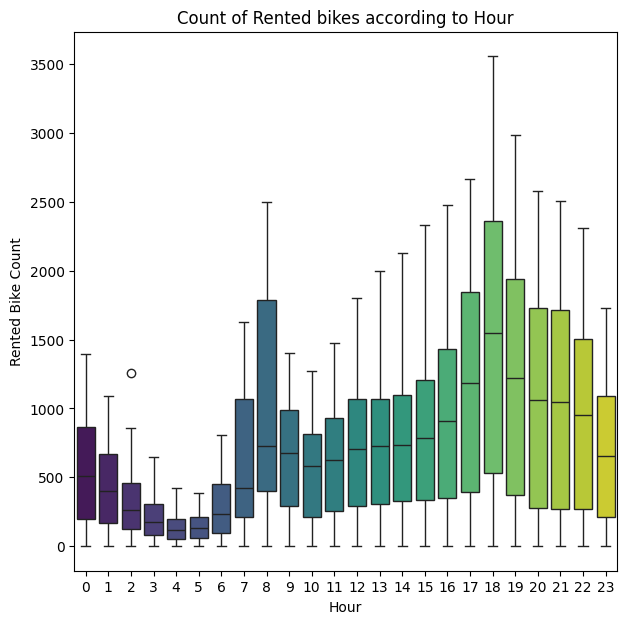

In [35]:
# Checking relationship between Independent feature: Hour & the Dependent variable
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(bike_df, x='Hour', y='Rented Bike Count', ax=ax, palette='viridis')
ax.set(title='Count of Rented bikes according to Hour')
plt.show()

##### 1. Why did you pick the specific chart?


*   Box plot for visualizing the count of rented bikes on an hourly basis.



##### 2. What is/are the insight(s) found from the chart?


*   The above plot showcases the usage of rented bikes across different hours throughout the year. It is notable that people tend to use rented bikes during their working hours, specifically from 7 AM to 9 AM and from 5 PM to 7 PM.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained i.e, people tend to use rented bikes during their working hours can have a positive business impact.
 Businesses can optimize their operations and marketing efforts during these peak hours to meet customer demand, attract more riders, and potentially increase revenue.

#### Chart - 9

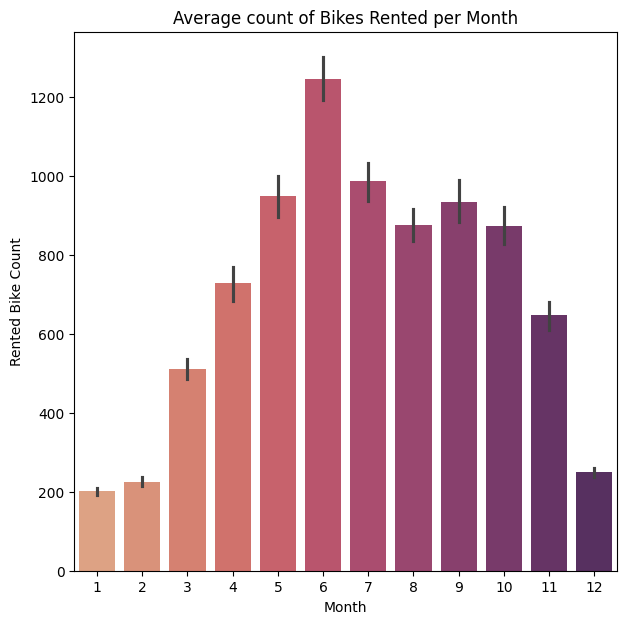

In [36]:
# Checking relationship between Independent feature: Month & the Dependent variable
plt.figure(figsize=(7,7))
sns.barplot(bike_df, x='Month', y='Rented Bike Count', palette='flare')
plt.title('Average count of Bikes Rented per Month')
plt.show()

##### 1. Why did you pick the specific chart?


*   Bar plot for visualizing the rented bike count over a period of 12 months.



##### 2. What is/are the insight(s) found from the chart?


*   During Summer season the demand for rented bikes are on hike.
*   During Winter season the demand for rented bikes is low.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained i.e, the demand for rented bikes is high during summer and low during winter can help businesses align their resources and marketing strategies accordingly, maximizing their revenue and creating a positive business impact.

### **Trivariate Analysis**

#### Chart - 10

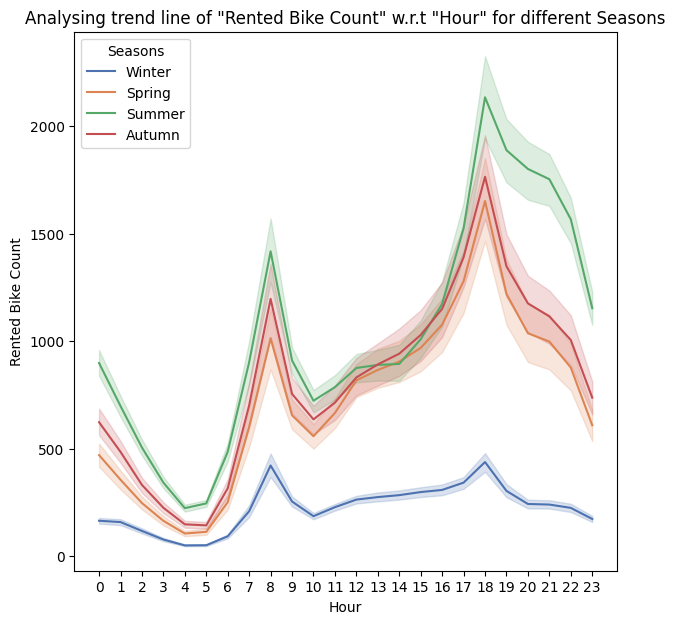

In [37]:
# Checking the relationship between Independent feature: Hour & the Dependent variable for different seasons
plt.figure(figsize=(7,7))
sns.lineplot(bike_df, x='Hour', y= "Rented Bike Count", hue='Seasons', palette='deep', alpha=1)
plt.xticks(range(0,24))
plt.title('Analysing trend line of "Rented Bike Count" w.r.t "Hour" for different Seasons')
plt.show()

##### 1. Why did you pick the specific chart?



*   Line plot for analyzing the count of rented bikes for different hours over 4 different seasons.



##### 2. What is/are the insight(s) found from the chart?


*   The analysis reveals that the use of rented bikes is significantly high during the summer season with peak demand during 7am-9am and 5pm-7pm.

*   However, during the winter season, the use of rented bikes is quite low due to snowfall.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained i.e, the high demand for rented bikes during the summer season and specific peak hours, as well as low demand during the winter season due to snowfall, can help businesses optimize operations, target marketing efforts, and adjust resources accordingly, leading to a positive business impact.

#### Chart - 11

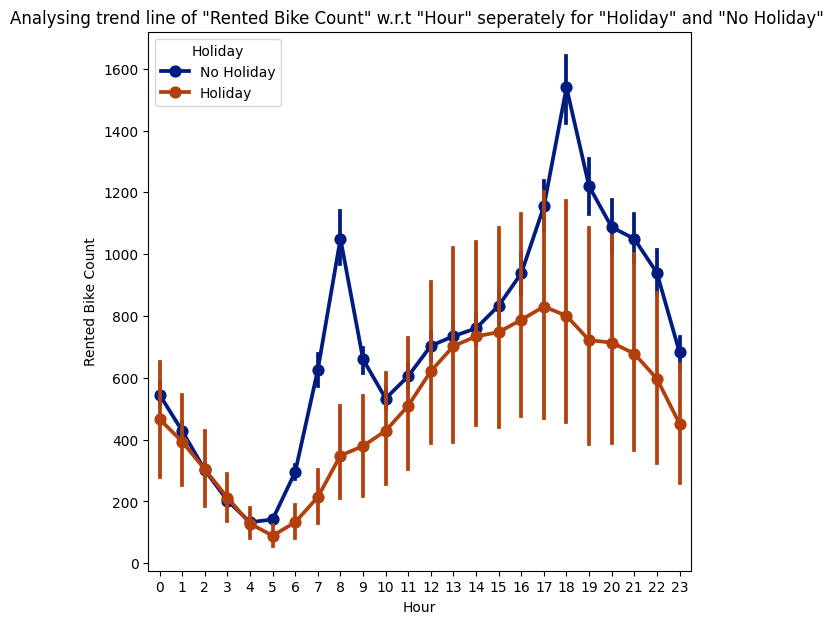

In [38]:
# Checking the relationship between Independent feature: Hour & the Dependent variable for Holidays & No Holidays
plt.figure(figsize=(7,7))
sns.pointplot(bike_df, x='Hour', y= "Rented Bike Count", hue='Holiday', palette='dark')
plt.title('Analysing trend line of "Rented Bike Count" w.r.t "Hour" seperately for "Holiday" and "No Holiday" ')
plt.show()

##### 1. Why did you pick the specific chart?


*   Point plot for analyzing the count of rented bikes for different hours over Holidays & Non-Holidays.



##### 2. What is/are the insight(s) found from the chart?


*   During Holidays People prefer to use rented bikes after 12 pm.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained i.e, people prefer to use rented bikes after 12 pm during holidays can help businesses adjust their operational hours and allocate resources effectively, catering to the increased demand and potentially creating a positive business impact.

#### Chart - 12

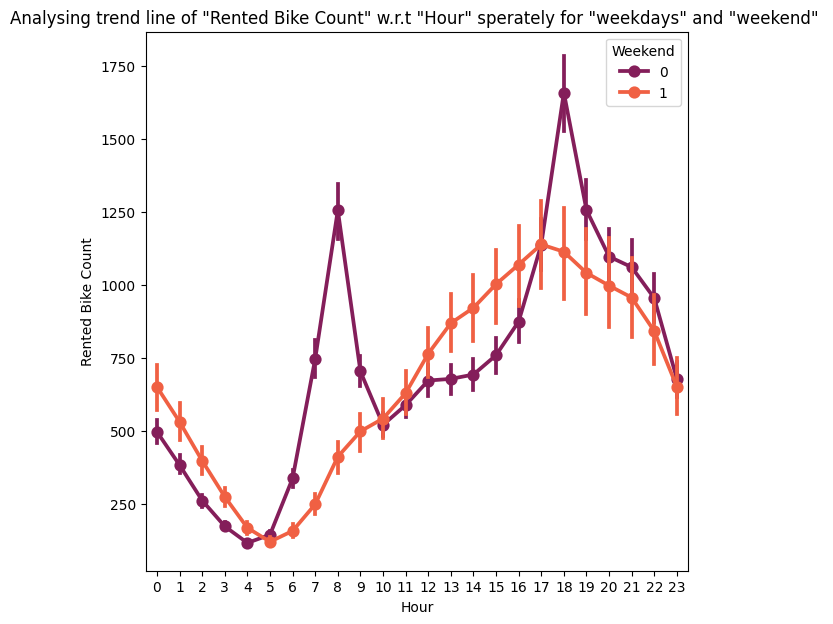

In [39]:
# Checking the relationship between Independent feature: Hour & the Dependent variable for Weekend & No Weekend
plt.figure(figsize=(7,7))
sns.pointplot(bike_df, x='Hour', y= "Rented Bike Count", hue='Weekend',palette='rocket')
plt.title('Analysing trend line of "Rented Bike Count" w.r.t "Hour" sperately for "weekdays" and "weekend" ')
plt.show()

##### 1. Why did you pick the specific chart?




*   Point plot for analyzing the count of rented bikes for different hours over Weekends and Non-Weekend days.




##### 2. What is/are the insight(s) found from the chart?




*  The demand for rented bikes is higher on weekdays and more specifically between 7am-9am and 5pm-7pm.
*  On weekends,the demand for rented bikes is generally lower, especially during the morning hours but rise thereafter.  
  






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained i.e, a higher demand for rented bikes on weekdays, specifically during peak commuting hours, and lower demand on weekends, especially in the morning, can help businesses optimize their operations, staffing, and marketing strategies to cater to these patterns, potentially leading to a positive business impact.

### **Multivariate Analysis**

#### Chart - 13

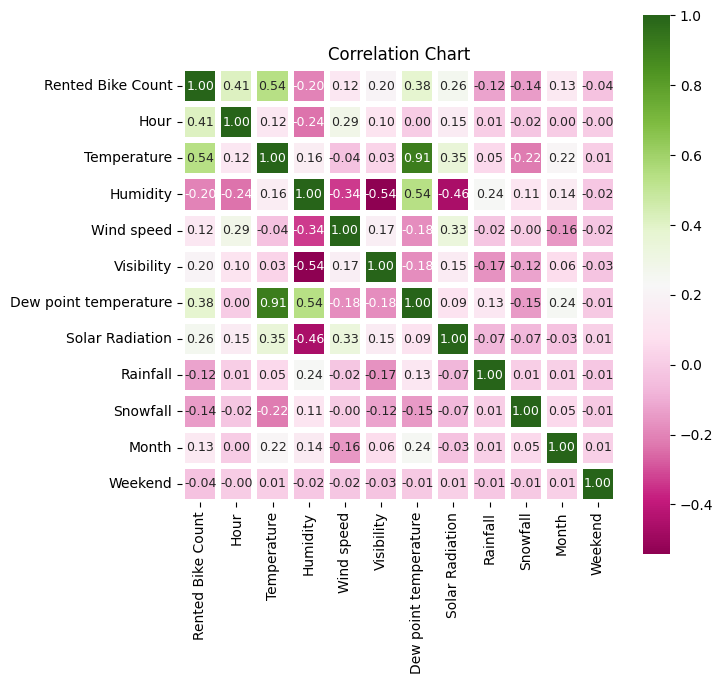

In [40]:
# Checking the correlation between multiple Independent variables
plt.figure(figsize=(7,7))
plt.title('Correlation Chart')
sns.heatmap(bike_df[bike_df.describe().columns].corr(),annot=True,annot_kws={'size': 9},linewidths=3,square=True,fmt='.2f',cmap='PiYG')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

*  We observe that columns 'Temperature' and 'Dew point temperature' are highly positively correlated, with a correlation coefficient of 0.91.
*  Visibility' and 'Humidity' have high negative correlation as compared to others, with a correlation coefficient of -0.54.

In [41]:
# Using VIF to remove Multicollinearity
def calc_vif(X):
  vif =pd.DataFrame()
  vif['Features']= X.columns
  vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif

In [42]:
calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ["Rented Bike Count"]]])

,Features,VIF
0,Hour,4.425348
1,Temperature,34.919399
2,Humidity,7.003058
3,Wind speed,4.881602
4,Visibility,9.378738
5,Dew point temperature,17.802987
6,Solar Radiation,2.882967
7,Rainfall,1.082184
8,Snowfall,1.131902
9,Month,5.094506


In [43]:
bike_df.drop(columns = ['Dew point temperature'],axis = 1, inplace = True)

In [44]:
calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ["Rented Bike Count"]]])

,Features,VIF
0,Hour,3.960112
1,Temperature,3.288623
2,Humidity,6.155420
3,Wind speed,4.651787
4,Visibility,5.359009
5,Solar Radiation,2.260940
6,Rainfall,1.080309
7,Snowfall,1.131108
8,Month,5.009301
9,Weekend,1.380635


In [45]:
bike_df.drop(columns = ['Humidity'],axis = 1, inplace = True)

In [46]:
calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ["Rented Bike Count"]]])

,Features,VIF
0,Hour,3.929274
1,Temperature,2.794584
2,Wind speed,4.281113
3,Visibility,5.280633
4,Solar Radiation,1.912107
5,Rainfall,1.046907
6,Snowfall,1.094804
7,Month,4.082794
8,Weekend,1.353591


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no significant relationship between the independent variables and the 'Rented Bike Count' (dependent variable).

**Alternate Hypothesis (Ha)**: There is a significant relationship between the independent variables and the 'Rented Bike Count' (dependent variable).

#### 2. Perform an appropriate statistical test.

####**Ordinary Least Square Model**

In [47]:
# Add a constant column to the DataFrame for the intercept term
bike_df = sm.add_constant(bike_df)

independent_vars=bike_df[bike_df.describe().columns].drop('Rented Bike Count',axis=1)
dependent_var=bike_df['Rented Bike Count']

# Perform the regression analysis
model = sm.OLS(dependent_var,independent_vars)
results = model.fit()

# Obtain the p-values
p_values = results.pvalues

print(round(p_values,5))

const              0.00000
Hour               0.00000
Temperature        0.00000
Wind speed         0.01120
Visibility         0.00000
Solar Radiation    0.53238
Rainfall           0.00000
Snowfall           0.10884
Month              0.00157
Weekend            0.00000
dtype: float64


In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     797.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:11:41   Log-Likelihood:                -66476.
No. Observations:                8760   AIC:                         1.330e+05
Df Residuals:                    8750   BIC:                         1.330e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -202.7172     19.513    -10.389      0.000    -240.967    -164.468
Hour               30.8584      0.779     39.611      0.000      29.331      32.385
Temperature        26.4803      0.495     53.540      0.000      25.511      27.450
Wind speed         14.2207      5.605      2.537      0.011       3.233      25.208
Visibility          0.1256      0.009     14.260      0.000       0.108       0.143
Solar Radiation     4.2730      6.843      0.624      0.532      -9.142      17.688
Rainfall          -74.6822      4.621    -16.163      0.000     -83.740     -65.625
Snowfall          -19.5051     12.163     -1.604      0.109     -43.348       4.338
Month               4.9264      1.558      3.163      0.002       1.873       7.980
Weekend           -55.2643     11.333     -4.876      0.000     -77.480     -33.048
==============================================================================
Omnibus:                      880.795   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1623.098
Skew:                           0.683   Prob(JB):                         0.00
Kurtosis:                       4.607   Cond. No.                     6.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusion**
* For the 'Solar_Radiation' variable, the p-value is 0.53238, which is greater than 0.05. Therefore, there is not enough evidence to conclude a significant relationship between 'Solar_Radiation' and the 'Rented Bike Count'.
*Similarly, for the 'Snowfall' variable, the p-value is 0.10884, which is also greater than 0.05. Hence, there is not enough evidence to establish a significant relationship between 'Snowfall' and the 'Rented Bike Count'.



In summary, based on the given p-values, we can reject the null hypothesis for the independent variables 'Hour', 'Temperature', 'Wind_speed', 'Visibility', 'Rainfall', 'Month', and 'Weekend'. This implies that there is a significant relationship between these independent variables and the 'Rented Bike Count'. However, there is insufficient evidence to reject the null hypothesis for the 'Solar_Radiation' and 'Snowfall' variables, indicating that these variables may not have a significant relationship with the 'Rented Bike Count'.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0)**: The dependent variable is normally distributed in the population.

**Alternative hypothesis (Ha)**: The dependent variable is not normally distributed in the population.

#### 2. Perform an appropriate statistical test.

####**Shapiro-Wilk test**

In [49]:
# Perform Statistical Test to obtain P-Value

from scipy import stats

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(bike_df['Rented Bike Count'])

print("Shapiro-Wilk Test")
print("Test statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Test statistic: 0.882217468728275
p-value: 6.957241296087808e-63


**Conclusion**


*   Based on the Shapiro-Wilk test results, with a test statistic of 0.8822 and a p-value of 0.0, the p-value is less than the chosen significance level (e.g., 0.05). Therefore, we would reject the null hypothesis (H0) that the dependent variable is normally distributed.




In [50]:
bike_df.drop('const',axis=1,inplace=True)

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

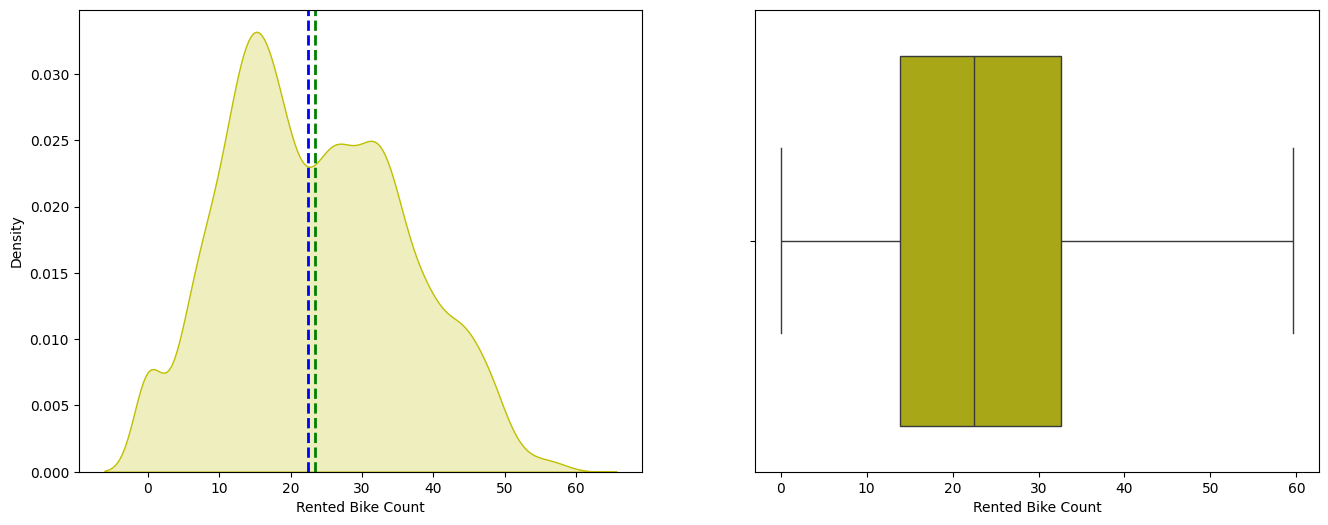

In [51]:
# Treatment of Outliers in our dependent Variable(applying square root transformation)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
sns.kdeplot(np.sqrt(bike_df['Rented Bike Count']),color='y',fill=True,ax=ax1)
ax1.axvline(np.sqrt(bike_df['Rented Bike Count']).mean(), color='green', linestyle='dashed', linewidth=2)
ax1.axvline(np.sqrt(bike_df['Rented Bike Count']).median(), color='blue', linestyle='dashed', linewidth=2)
sns.boxplot(x= np.sqrt(bike_df['Rented Bike Count']),color='y')
plt.show()

### 2. Categorical Encoding

In [52]:
#ONE HOT ENCODING
cat_features=['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Month',
       'Weekend']
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

In [53]:
for col in cat_features:
    bike_df = one_hot_encoding(bike_df, col)
bike_df.head()

,Rented Bike Count,Temperature,Wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Weekend_1
0,254,-5.2,2.2,2000,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,204,-5.5,0.8,2000,0.0,0.0,0.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,173,-6.0,1.0,2000,0.0,0.0,0.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,107,-6.2,0.9,2000,0.0,0.0,0.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,78,-6.0,2.3,2000,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [54]:
bike_df.columns

Index(['Rented Bike Count', 'Temperature', 'Wind speed', 'Visibility',
       'Solar Radiation', 'Rainfall', 'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Weekend_1'],
      dtype='object')

### 3. Data Scaling

In [55]:
# Scaling your data
features = list(set(bike_df.columns) - {'Rented Bike Count'})
from scipy.stats import zscore
bike_df[features]=bike_df[features].apply(zscore)

## ***7. ML Model Implementation***

In [56]:
X=bike_df.drop('Rented Bike Count',axis=1)
y=np.sqrt(bike_df['Rented Bike Count'])

In [57]:
# TRAIN TEST SPLIT
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=19)
print(X_train.shape)
print(X_test.shape)

(6570, 46)
(2190, 46)


### ML Model - 1

### **Linear Regression**

In [58]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [59]:
#check the score
lr.score(X_train,y_train)

0.7633776201417123

In [60]:
#check the coefficient
lr.coef_

array([ 6.57492588e+00, -3.70436970e-02,  1.93912818e+00,  1.65470440e+00,
       -1.85110789e+00, -2.94909850e-01, -3.84274579e-01, -9.46108040e-01,
       -1.53424008e+00, -1.91258181e+00, -1.90716639e+00, -9.26300816e-01,
        3.32693588e-01,  1.53806030e+00,  2.29747579e-01, -6.61151334e-01,
       -6.37413363e-01, -5.43511915e-01, -5.38606863e-01, -5.26318320e-01,
       -2.10893135e-01,  1.35327829e-01,  9.59306407e-01,  2.11946713e+00,
        1.49729557e+00,  1.30893609e+00,  1.38498071e+00,  1.08018875e+00,
        3.20988498e-01,  1.90308516e+14,  3.98568395e+13,  2.01679657e+13,
        6.54731154e-01,  5.22497548e+00, -3.18609687e-01, -1.09145860e+14,
       -1.07531628e+14, -1.09145860e+14, -1.23605851e+13, -1.25461385e+13,
       -1.25461385e+13,  1.28516096e+13,  1.30445341e+13,  1.28516096e+13,
        3.46460061e-01, -6.49442225e-01])

In [61]:
# Prediction
y_pred_train= lr.predict(X_train)
y_pred_test= lr.predict(X_test)

In [62]:
# Metrics evaluation for Train set
# 1. mean_squared_error
mse_lr= mean_squared_error(y_train,y_pred_train)
print('MSE :' , mse_lr)
#2. Root_mean_squared_error
rmse_lr=np.sqrt(mse_lr)
print('RMSE :' , rmse_lr)
#3. mean_absolute_error
mae_lr=mean_absolute_error(y_train,y_pred_train)
print('MAE :' ,mae_lr)
#4. coefficient of determination(r2_score)
r2_lr=r2_score(y_train,y_pred_train)
print('R2 :' ,r2_lr)
#5. adjusted  coefficient of determination
adjusted_r2_lr=(1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_lr)

MSE : 36.5265251861398
RMSE : 6.0437178281368995
MAE : 4.55742818625396
R2 : 0.7633776201417123
Adjusted R2 : 0.7617089662288683


In [63]:
#Storing
lr_dict={'Model':'Linear Regression','MAE':round(mae_lr,2),'MSE':round(mse_lr,2),'RMSE':round(rmse_lr,2),'R2_score':round(r2_lr,2),'Adjusted R2_score':round(adjusted_r2_lr,2)}
training_df=pd.DataFrame(lr_dict,index=[1])
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Linear Regression,4.56,36.53,6.04,0.76,0.76


In [64]:
# Metrics evaluation for Test set
# 1. mean_squared_error
mse_lr= mean_squared_error(y_test,y_pred_test)
print('MSE :' , mse_lr)
#2. Root_mean_squared_error
rmse_lr=np.sqrt(mse_lr)
print('RMSE :' , rmse_lr)
#3. mean_absolute_error
mae_lr=mean_absolute_error(y_test,y_pred_test)
print('MAE :' ,mae_lr)
#4. coefficient of determination(r2_score)
r2_lr=r2_score(y_test,y_pred_test)
print('R2 :' ,r2_lr)
#5. adjusted  coefficient of determination
adjusted_r2_lr=(1-(1-r2_score(y_test,y_pred_test))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_lr)

MSE : 37.478937503124506
RMSE : 6.122004369740723
MAE : 4.564437195659567
R2 : 0.7611266137688508
Adjusted R2 : 0.7594420858267026


In [65]:
#Storing
lr_dict2={'Model':'Linear Regression','MAE':round(mae_lr,2),'MSE':round(mse_lr,2),'RMSE':round(rmse_lr,2),'R2_score':round(r2_lr,2),'Adjusted R2_score':round(adjusted_r2_lr,2)}
test_df=pd.DataFrame(lr_dict2,index=[1])
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Linear Regression,4.56,37.48,6.12,0.76,0.76


### **Concluding Remark:**

* The linear regression model shows moderate performance on both the training and test sets.
* The model achieves an R-squared (R2) value of approximately 0.76, indicating that around 76% of the variance in the target variable is explained by the independent variables.
* The mean squared error (MSE) values are 36.49 (training set) and 37.49 (test set), suggesting moderate errors in the predictions.
* The root mean squared error (RMSE) values are around 6.04 and 6.12, indicating the average magnitude of the errors.
* The mean absolute error (MAE) values are approximately 4.55 and 4.56, representing the average absolute deviation of the predictions.
* The adjusted R-squared values account for the number of predictors in the model, showing a similar pattern.
* Overall, further analysis and model refinement may be beneficial to improve the performance.

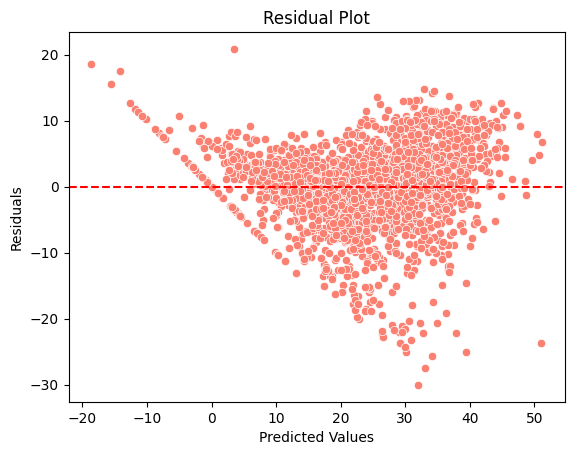

In [66]:
# Checking Heteroscedasticity
residuals = y_test - y_pred_test
sns.scatterplot(x=y_pred_test, y=residuals,color='salmon')

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')


plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()

* **Since,the  points in the scatter plot are more or less evenly distributed on both sides of the line y=0, it suggests that the residuals have relatively consistent variability across the range of predicted values. This indicates homoscedasticity rather than heteroscedasticity**.

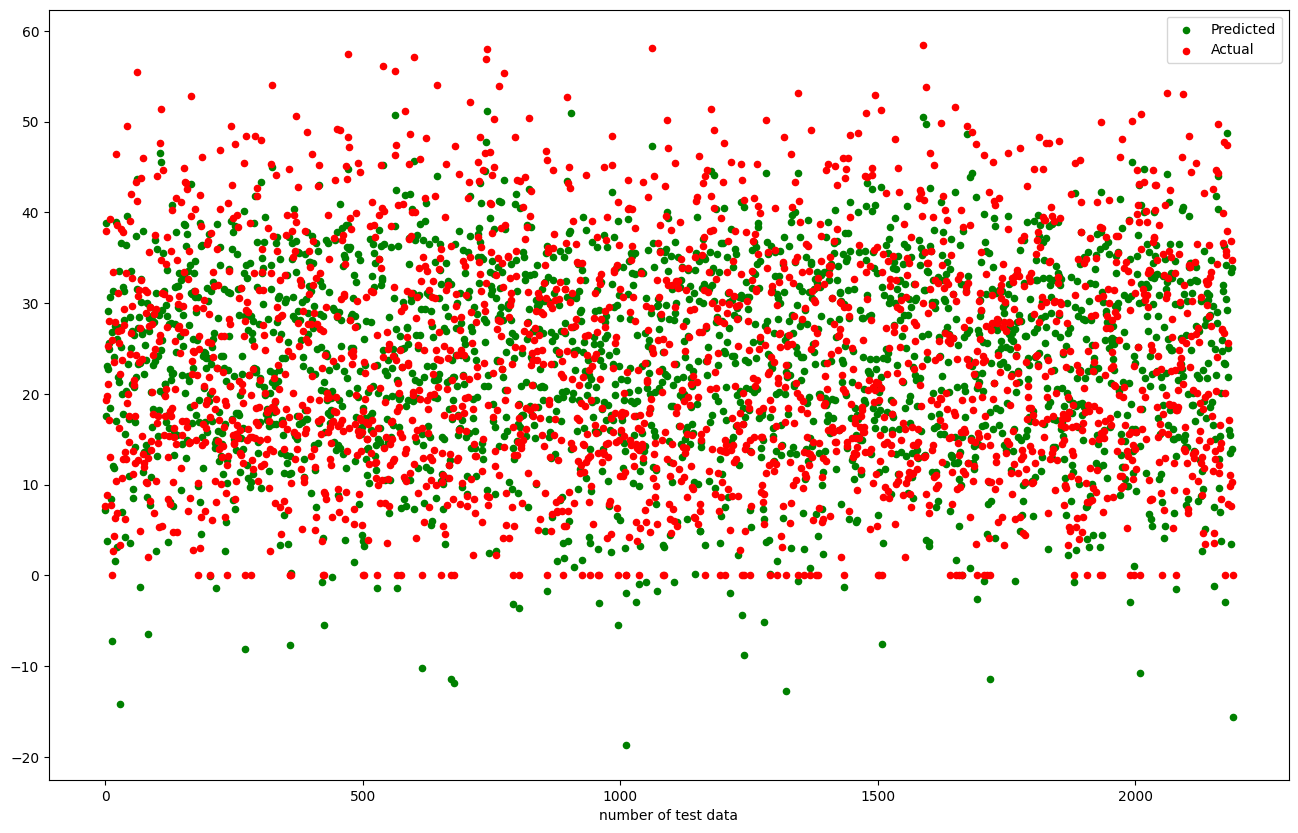

In [67]:
plt.figure(figsize=(16,10))
plt.scatter(range(len(y_pred_test)),y_pred_test,s=20,c='green',label='Predicted')
plt.scatter(range(len(y_test)), y_test, s=20, c='red', label='Actual')
plt.legend()
plt.xlabel('number of test data')
plt.show()

### ML Model - 2

### **Lasso Regression(L1 Regularization)**

In [68]:
lasso = Lasso(alpha=0.1,max_iter=3500)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3500)

In [69]:
#check the score
lasso.score(X_train,y_train)

0.7601251825757874

In [70]:
# Prediction
y_pred_train_lasso= lasso.predict(X_train)
y_pred_test_lasso= lasso.predict(X_test)

In [71]:
# Metrics evaluation for Train set
# 1. mean_squared_error
mse_lasso= mean_squared_error(y_train,y_pred_train_lasso)
print('MSE :' , mse_lasso)
#2. Root_mean_squared_error
rmse_lasso=np.sqrt(mse_lasso)
print('RMSE :' , rmse_lasso)
#3. mean_absolute_error
mae_lasso=mean_absolute_error(y_train,y_pred_train_lasso)
print('MAE :' ,mae_lasso)
#4. coefficient of determination(r2_score)
r2_lasso=r2_score(y_train,y_pred_train_lasso)
print('R2 :' ,r2_lasso)
#5. adjusted  coefficient of determination
adjusted_r2_lasso=(1-(1-r2_score(y_train,y_pred_train_lasso))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_lasso)

MSE : 37.02859199291965
RMSE : 6.085112323771818
MAE : 4.571329774881155
R2 : 0.7601251825757874
Adjusted R2 : 0.7584335925709562


In [72]:
# Example dictionary with Lasso regression metrics
lasso_dict = {
    'Model': 'Lasso Regression',
    'MAE': round(mae_lasso, 2),
    'MSE': round(mse_lasso, 2),
    'RMSE': round(rmse_lasso, 2),
    'R2_score': round(r2_lasso, 2),
    'Adjusted R2_score': round(adjusted_r2_lasso, 2)
}

# Convert the dictionary to a DataFrame
lasso_df = pd.DataFrame([lasso_dict])

# Concatenate the new row with the existing DataFrame
training_df = pd.concat([training_df, lasso_df], ignore_index=True)

# Display the updated DataFrame
print(training_df)

               Model   MAE    MSE  RMSE  R2_score  Adjusted R2_score
0  Linear Regression  4.56  36.53  6.04      0.76               0.76
1   Lasso Regression  4.57  37.03  6.09      0.76               0.76


In [73]:
# Metrics evaluation for Test set
# 1. mean_squared_error
mse_lasso= mean_squared_error(y_test,y_pred_test_lasso)
print('MSE :' , mse_lasso)
#2. Root_mean_squared_error
rmse_lasso=np.sqrt(mse_lasso)
print('RMSE :' , rmse_lasso)
#3. mean_absolute_error
mae_lasso=mean_absolute_error(y_test,y_pred_test_lasso)
print('MAE :' ,mae_lasso)
#4. coefficient of determination(r2_score)
r2_lasso=r2_score(y_test,y_pred_test_lasso)
print('R2 :' ,r2_lasso)
#5. adjusted  coefficient of determination
adjusted_r2_lasso=(1-(1-r2_score(y_test,y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_lasso)

MSE : 38.59870286591022
RMSE : 6.212785435367152
MAE : 4.619906183995424
R2 : 0.7539897480567245
Adjusted R2 : 0.7487090800262108


In [74]:
# Example dictionary with Lasso regression metrics for test data
lasso_dict2 = {
    'Model': 'Lasso Regression',
    'MAE': round(mae_lasso, 2),
    'MSE': round(mse_lasso, 2),
    'RMSE': round(rmse_lasso, 2),
    'R2_score': round(r2_lasso, 2),
    'Adjusted R2_score': round(adjusted_r2_lasso, 2)
}

# Convert the dictionary to a DataFrame
lasso_df2 = pd.DataFrame([lasso_dict2])

# Concatenate the new row with the existing DataFrame
test_df = pd.concat([test_df, lasso_df2], ignore_index=True)

# Display the updated DataFrame
print(test_df)

               Model   MAE    MSE  RMSE  R2_score  Adjusted R2_score
0  Linear Regression  4.56  37.48  6.12      0.76               0.76
1   Lasso Regression  4.62  38.60  6.21      0.75               0.75


### ML Model - 3

###**Ridge Regression(L2 Regularization)**

In [75]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [76]:
#check the score
ridge.score(X_train,y_train)

0.7636010821968624

In [77]:
# Prediction
y_pred_train_ridge= ridge.predict(X_train)
y_pred_test_ridge= ridge.predict(X_test)

In [78]:
# Metrics Evaluation for Train set
# 1. mean_squared_error
mse_ridge= mean_squared_error(y_train,y_pred_train_ridge)
print('MSE :' , mse_ridge)
#2. Root_mean_squared_error
rmse_ridge=np.sqrt(mse_ridge)
print('RMSE :' , rmse_ridge)
#3. mean_absolute_error
mae_ridge=mean_absolute_error(y_train,y_pred_train_ridge)
print('MAE :' ,mae_ridge)
#4. coefficient of determination(r2_score)
r2_ridge=r2_score(y_train,y_pred_train_ridge)
print('R2 :' ,r2_ridge)
#5. adjusted  coefficient of determination
adjusted_r2_ridge=(1-(1-r2_score(y_train,y_pred_train_ridge))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_ridge)

MSE : 36.49203017180312
RMSE : 6.040863363113184
MAE : 4.553276502635143
R2 : 0.7636010821968624
Adjusted R2 : 0.7619340041317169


In [79]:
# Example dictionary with Ridge regression metrics
ridge_dict = {
    'Model': 'Ridge Regression',
    'MAE': round(mae_ridge, 2),
    'MSE': round(mse_ridge, 2),
    'RMSE': round(rmse_ridge, 2),
    'R2_score': round(r2_ridge, 2),
    'Adjusted R2_score': round(adjusted_r2_ridge, 2)
}

# Convert the dictionary to a DataFrame
ridge_df = pd.DataFrame([ridge_dict])

# Concatenate the new row with the existing DataFrame
training_df = pd.concat([training_df, ridge_df], ignore_index=True)

# Display the updated DataFrame
print(training_df)


               Model   MAE    MSE  RMSE  R2_score  Adjusted R2_score
0  Linear Regression  4.56  36.53  6.04      0.76               0.76
1   Lasso Regression  4.57  37.03  6.09      0.76               0.76
2   Ridge Regression  4.55  36.49  6.04      0.76               0.76


In [80]:
# Metrics Evaluation for Test set
# 1. mean_squared_error
mse_ridge= mean_squared_error(y_test,y_pred_test_ridge)
print('MSE :' , mse_ridge)
#2. Root_mean_squared_error
rmse_ridge=np.sqrt(mse_ridge)
print('RMSE :' , rmse_ridge)
#3. mean_absolute_error
mae_ridge=mean_absolute_error(y_test,y_pred_test_ridge)
print('MAE :' ,mae_ridge)
#4. coefficient of determination(r2_score)
r2_ridge=r2_score(y_test,y_pred_test_ridge)
print('R2 :' ,r2_ridge)
#5. adjusted  coefficient of determination
adjusted_r2_ridge=(1-(1-r2_score(y_test,y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_ridge)

MSE : 37.492899052098196
RMSE : 6.1231445395399735
MAE : 4.561722436191943
R2 : 0.7610376293231178
Adjusted R2 : 0.7559082457248273


In [81]:
# Example dictionary with Ridge regression metrics for test data
ridge_dict2 = {
    'Model': 'Ridge Regression',
    'MAE': round(mae_ridge, 2),
    'MSE': round(mse_ridge, 2),
    'RMSE': round(rmse_ridge, 2),
    'R2_score': round(r2_ridge, 2),
    'Adjusted R2_score': round(adjusted_r2_ridge, 2)
}

# Convert the dictionary to a DataFrame
ridge_df2 = pd.DataFrame([ridge_dict2])

# Concatenate the new row with the existing DataFrame
test_df = pd.concat([test_df, ridge_df2], ignore_index=True)

# Display the updated DataFrame
print(test_df)

               Model   MAE    MSE  RMSE  R2_score  Adjusted R2_score
0  Linear Regression  4.56  37.48  6.12      0.76               0.76
1   Lasso Regression  4.62  38.60  6.21      0.75               0.75
2   Ridge Regression  4.56  37.49  6.12      0.76               0.76


# **Conclusion**

In our analysis, we began by conducting an exploratory data analysis (EDA) on all features in the dataset. We started by examining the dependent variable, 'Rented Bike Count,' and made necessary transformations to ensure its suitability for modeling. Moving on, we focused on the categorical variables and eliminated those with a dominant single class. For the numerical variables, we calculated correlations, studied their distributions, and analyzed their relationships with the dependent variable. Additionally, we removed numerical features mostly consisting of 0 values and performed one-hot encoding for the categorical variables.

Next, we implemented three machine learning algorithms: Linear Regression, Lasso Regression & Ridge Regression. Our evaluation yielded the following findings:

In [82]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model   MAE    MSE  RMSE  R2_score  \
Training set 0  Linear Regression  4.56  36.53  6.04      0.76   
             1   Lasso Regression  4.57  37.03  6.09      0.76   
             2   Ridge Regression  4.55  36.49  6.04      0.76   
Test set     0  Linear Regression  4.56  37.48  6.12      0.76   
             1   Lasso Regression  4.62  38.60  6.21      0.75   
             2   Ridge Regression  4.56  37.49  6.12      0.76   

                Adjusted R2_score  
Training set 0               0.76  
             1               0.76  
             2               0.76  
Test set     0               0.76  
             1               0.75  
             2               0.76

* Linear Regression, Lasso Regression & Ridge Regression show similar performance on both the training and test sets. They have comparable MAE, MSE, RMSE, R2 score, and adjusted R2 score values, indicating consistent predictive accuracy across the two datasets.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***